# Неделя 1. Четверг
## Введение в AB-тесты

In [64]:
import pandas as pd
import datetime as dt
import numpy as np

orders = pd.read_csv('aux/data_for_tasks_3.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

visitors = pd.read_csv('aux/data_for_tasks_3_visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

orders.head()

,userId,group,orderId,revenue,date
0,1.815263e+19,B,4.612878e+15,489,2019-04-22
1,1.815263e+19,B,4.612878e+15,489,2019-04-22
2,1.794078e+19,B,4.136278e+18,97,2019-04-22
3,1.794078e+19,B,4.136278e+18,279,2019-04-22
4,2.461477e+18,B,1.406554e+19,4092,2019-04-22


In [65]:
visitors.head()

,date,group,visitors
0,2019-03-11,A,321
1,2019-03-12,A,831
2,2019-03-13,A,700
3,2019-03-14,A,1222
4,2019-03-15,A,859


In [63]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group'])
                    ]\
.agg({
        'date' : 'max', 
        'group' : 'max', 
        'orderId' : pd.Series.nunique, 
        'userId' : pd.Series.nunique, 
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], 
            visitors['group'] == x['group'])
    ].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-03-11,A,10,10,110291,321
1,2019-03-11,B,9,9,36646,337
2,2019-03-12,A,35,33,343089,1152
3,2019-03-12,B,35,33,90491,1198
4,2019-03-13,A,59,56,1012663,1852


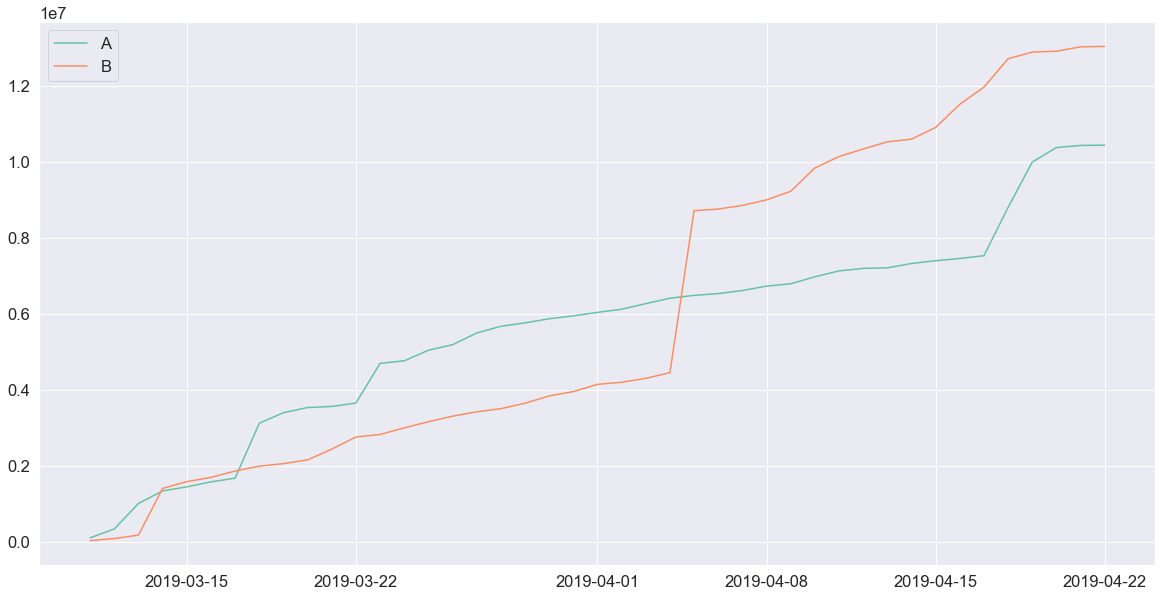

In [67]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

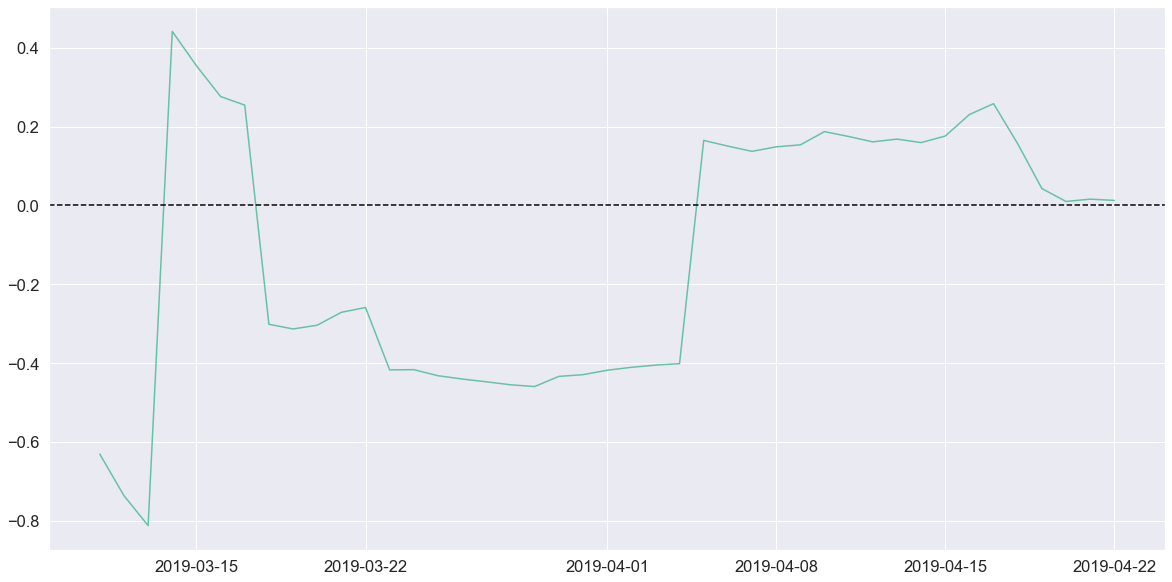

In [69]:
plt.figure(figsize=(20,10))

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--');

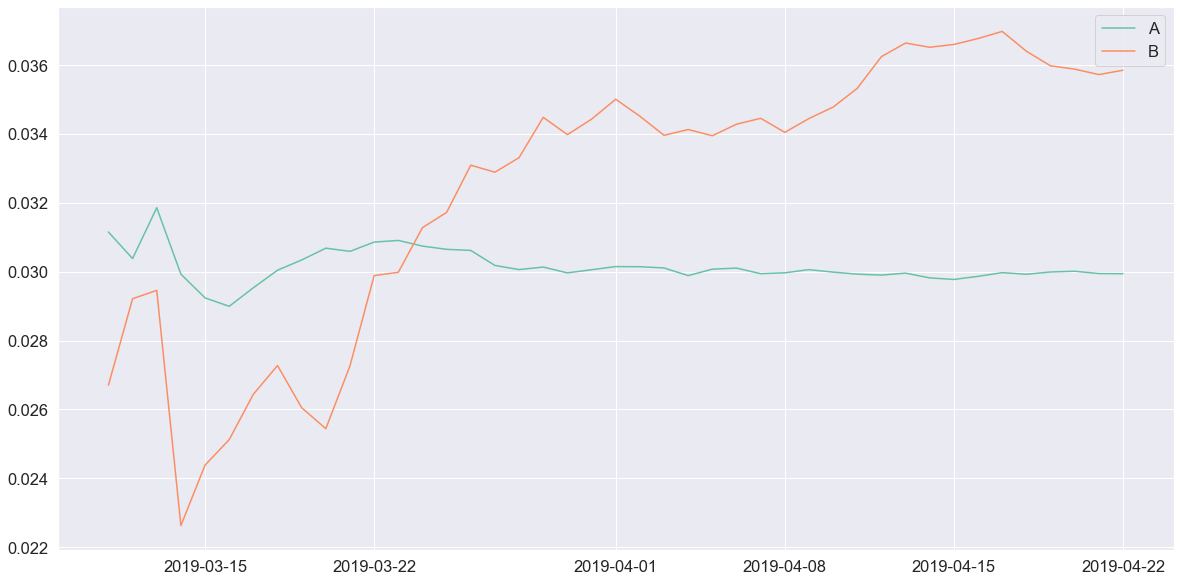

In [72]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.figure(figsize=(20,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


#plt.axis(["2019-03-10", '2019-04-23', 0, 0.05])

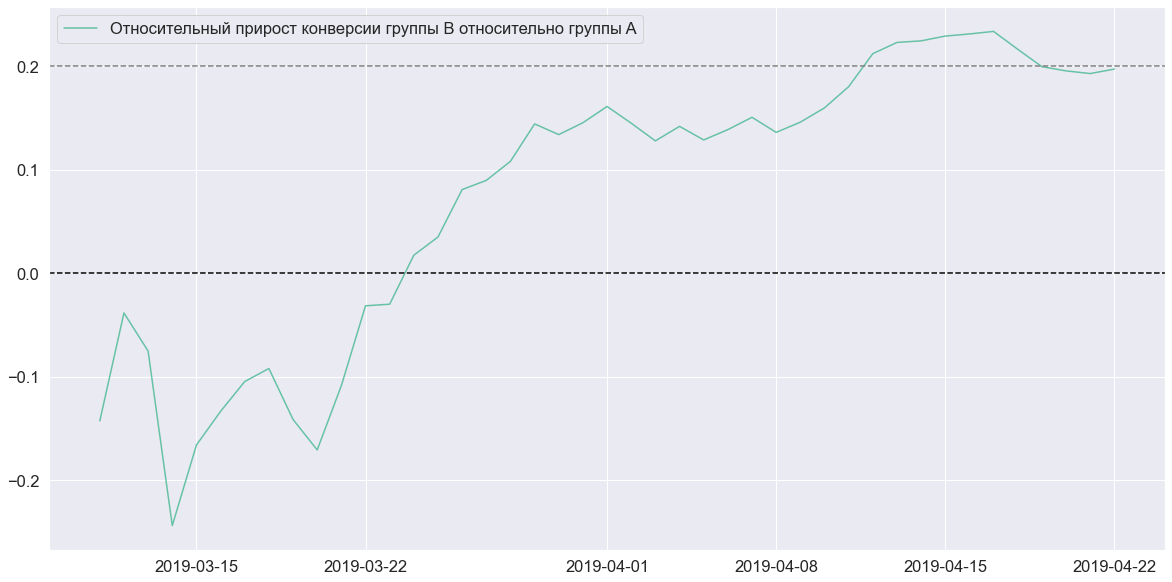

In [75]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');